# I. ENTRAINEMENT DU MODELE YOLOV5 POUR LA DETECTION DES CABOSSES DE CACAO SUR LES IMAGES DES CACAOYERS

## 🛠 **Étape 1 : Modifier les annotations**
Ce script va :
- **Parcourir tous les fichiers `.txt`** dans `Cocoa`
- **Remplacer la première colonne (classe) par `0`**
- **Enregistrer les nouveaux fichiers `.txt`**



---

## 🏗 **Étape 2 : Réorganiser les fichiers**
Après avoir modifié les annotations, on **déplace** les images et fichiers `.txt` dans un dossier unique pour l'entraînement.

## 📄 **Étape 3 : Créer `data.yaml`**

## 🚀 **Étape 4 : Lancer l'entraînement YOLOv5**


## ✅ **Résumé**
1️⃣ **Modifier toutes les annotations `.txt`** pour avoir `0` comme classe unique  
2️⃣ **Réorganiser les fichiers** dans un seul dossier (`train` et `val`)  
3️⃣ **Créer le fichier `data.yaml`** avec une seule classe `"cabosse"`  
4️⃣ **Entraîner YOLOv5** 🚀  

Avec ça, YOLOv5 pourra **détecter les cabosses sur n'importe quelle image**, même celles prises par un agriculteur 📸 !

In [2]:
import os

base_dir = "Cocoa"
for cls in ["Fito", "Monilia", "Sana"]:
    cls_dir = os.path.join(base_dir, cls)
    for file in os.listdir(cls_dir):
        if file.endswith(".txt"):
            file_path = os.path.join(cls_dir, file)
            with open(file_path, "r") as f:
                lines = f.readlines()

            new_lines = []
            for line in lines:
                parts = line.strip().split()
                parts[0] = "0"  # Remplacer la classe par "0"
                new_lines.append(" ".join(parts))

            with open(file_path, "w") as f:
                f.write("\n".join(new_lines))

print("✅ Toutes les annotations ont été modifiées pour utiliser une seule classe ('cabosse').")


✅ Toutes les annotations ont été modifiées pour utiliser une seule classe ('cabosse').


In [3]:
import os
import shutil
import random

# Dossier principal
base_dir = "Cocoa"
new_images_dir = os.path.join(base_dir, "images")
new_labels_dir = os.path.join(base_dir, "labels")

# Créer les sous-dossiers train/val
for split in ["train", "val"]:
    os.makedirs(os.path.join(new_images_dir, split), exist_ok=True)
    os.makedirs(os.path.join(new_labels_dir, split), exist_ok=True)

# Rassembler toutes les images des 3 dossiers (Fito, Monilia, Sana)
image_files = []
for cls in ["Fito", "Monilia", "Sana"]:
    cls_dir = os.path.join(base_dir, cls)
    for file in os.listdir(cls_dir):
        if file.endswith(".jpg"):
            image_files.append(os.path.join(cls_dir, file))

# Mélanger et diviser en train (80%) et val (20%)
random.shuffle(image_files)
split_idx = int(0.8 * len(image_files))

for i, img_path in enumerate(image_files):
    txt_path = img_path.replace(".jpg", ".txt")
    split = "train" if i < split_idx else "val"
    
    if os.path.exists(txt_path):  # Vérifier si l'annotation existe bien
        shutil.move(img_path, os.path.join(new_images_dir, split, os.path.basename(img_path)))
        shutil.move(txt_path, os.path.join(new_labels_dir, split, os.path.basename(txt_path)))

print("🚀 Réorganisation des fichiers terminée !")


🚀 Réorganisation des fichiers terminée !


In [4]:
yaml_content = """train: ./Cocoa/images/train
val: ./Cocoa/images/val
nc: 1
names: ["cabosse"]
"""

with open("Cocoa/data.yaml", "w") as f:
    f.write(yaml_content)

print("✅ Fichier data.yaml créé avec succès !")


✅ Fichier data.yaml créé avec succès !


In [5]:
import torch
from pathlib import Path
from ultralytics import YOLO

# Vérifier si CUDA est dispo
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(f"Utilisation de : {device}")

# Charger YOLOv5 et entraîner
model = YOLO("yolov5s.pt")  # Modèle pré-entraîné

#C:/Users/AMOUSSOU/Documents/MASTER 2 DATA SCIENCE/Apprentissage profond (DEEP LEARNING)/PROJET/Cocoa/data.yaml"


Utilisation de : cpu
PRO TIP  Replace 'model=yolov5s.pt' with new 'model=yolov5su.pt'.
YOLOv5 'u' models are trained with https://github.com/ultralytics/ultralytics and feature improved performance vs standard YOLOv5 models trained with https://github.com/ultralytics/yolov5.



In [13]:
model.train(data="data.yaml",  # Fichier de config
            epochs=50,               # Augmente le nombre d'epochs si besoin
            imgsz=640,               # Taille des images
            batch=16,                 # Ajuste en fonction de ta RAM
            device=device,            # Utiliser GPU si dispo
            project="runs/train",     # Emplacement des résultats
            name="exp_custom",        # Nom spécifique à l'expérience
            save_period=5,            # Sauvegarde toutes les 5 epochs
            save=True)                # Sauvegarde les meilleurs modèles


Ultralytics 8.3.74  Python-3.12.7 torch-2.5.1+cpu CPU (Intel Core(TM) i7-10610U 1.80GHz)
engine\trainer: task=detect, mode=train, model=yolov5s.pt, data=data.yaml, epochs=50, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=5, cache=False, device=cpu, workers=8, project=runs/train, name=exp_custom23, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxe

2025-04-03 10:21:55,665	INFO util.py:154 -- Outdated packages:
  ipywidgets==7.8.1 found, needs ipywidgets>=8
Run `pip install -U ipywidgets`, then restart the notebook server for rich notebook output.
2025-04-03 10:22:01,212	INFO util.py:154 -- Outdated packages:
  ipywidgets==7.8.1 found, needs ipywidgets>=8
Run `pip install -U ipywidgets`, then restart the notebook server for rich notebook output.


Overriding model.yaml nc=80 with nc=1

                   from  n    params  module                                       arguments                     
  0                  -1  1      3520  ultralytics.nn.modules.conv.Conv             [3, 32, 6, 2, 2]              
  1                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  2                  -1  1     18816  ultralytics.nn.modules.block.C3              [64, 64, 1]                   
  3                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  4                  -1  2    115712  ultralytics.nn.modules.block.C3              [128, 128, 2]                 
  5                  -1  1    295424  ultralytics.nn.modules.conv.Conv             [128, 256, 3, 2]              
  6                  -1  3    625152  ultralytics.nn.modules.block.C3              [256, 256, 3]                 
  7                  -1  1   1180672  ultralytics

train: Scanning C:\Users\AMOUSSOU\Documents\MASTER 2 DATA SCIENCE\Apprentissage profond (DEEP LEARNING)\PROJET\Cocoa\labels\train... 312 images, 0 backgrounds, 0 corrupt: 100%|██████████| 312/312 [00:00<00:00, 342.20it/s]

train: New cache created: C:\Users\AMOUSSOU\Documents\MASTER 2 DATA SCIENCE\Apprentissage profond (DEEP LEARNING)\PROJET\Cocoa\labels\train.cache



val: Scanning C:\Users\AMOUSSOU\Documents\MASTER 2 DATA SCIENCE\Apprentissage profond (DEEP LEARNING)\PROJET\Cocoa\labels\val... 63 images, 0 backgrounds, 0 corrupt: 100%|██████████| 63/63 [00:00<00:00, 410.92it/s]

val: New cache created: C:\Users\AMOUSSOU\Documents\MASTER 2 DATA SCIENCE\Apprentissage profond (DEEP LEARNING)\PROJET\Cocoa\labels\val.cache


Plotting labels to runs\train\exp_custom23\labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 69 weight(decay=0.0), 76 weight(decay=0.0005), 75 bias(decay=0.0)
TensorBoard: model graph visualization added 
Image sizes 640 train, 640 val
Using 0 dataloader workers
Logging results to runs\train\exp_custom23
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50         0G      1.423      1.671      1.279         77        640: 100%|██████████| 20/20 [07:32<00:00, 22.64s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:27<00:00, 13.87s/it]

                   all         63        289      0.721       0.67      0.732      0.472



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50         0G       1.36      1.088      1.183         69        640: 100%|██████████| 20/20 [07:01<00:00, 21.07s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:33<00:00, 16.80s/it]

                   all         63        289      0.816      0.699      0.793      0.506



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50         0G      1.398      1.062      1.202         90        640: 100%|██████████| 20/20 [06:48<00:00, 20.42s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:24<00:00, 12.44s/it]

                   all         63        289      0.628      0.665      0.652      0.382



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50         0G      1.404      1.044      1.221         69        640: 100%|██████████| 20/20 [07:04<00:00, 21.23s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:27<00:00, 13.61s/it]

                   all         63        289      0.276      0.626       0.49      0.309



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50         0G      1.431      1.077      1.234         58        640: 100%|██████████| 20/20 [07:05<00:00, 21.30s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:39<00:00, 19.94s/it]

                   all         63        289      0.584      0.685      0.689      0.419



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50         0G      1.386     0.9931      1.189         75        640: 100%|██████████| 20/20 [10:18<00:00, 30.91s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:32<00:00, 16.10s/it]

                   all         63        289      0.676      0.737      0.736      0.431



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50         0G      1.419     0.9749      1.207         68        640: 100%|██████████| 20/20 [07:17<00:00, 21.88s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:25<00:00, 12.55s/it]

                   all         63        289      0.706      0.654      0.701      0.452



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50         0G      1.393     0.9676      1.212         69        640: 100%|██████████| 20/20 [07:06<00:00, 21.32s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:26<00:00, 13.14s/it]

                   all         63        289      0.794      0.702      0.807       0.52



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50         0G       1.34      0.929      1.189         57        640: 100%|██████████| 20/20 [07:21<00:00, 22.10s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:25<00:00, 12.71s/it]

                   all         63        289      0.756      0.789       0.81      0.462



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50         0G      1.323     0.9218      1.173         61        640: 100%|██████████| 20/20 [06:47<00:00, 20.38s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:25<00:00, 12.54s/it]

                   all         63        289      0.838      0.775      0.845       0.53



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50         0G      1.376     0.9342      1.183         52        640: 100%|██████████| 20/20 [07:22<00:00, 22.13s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:24<00:00, 12.09s/it]

                   all         63        289      0.818       0.76      0.849      0.536



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50         0G      1.328     0.8764      1.168         85        640: 100%|██████████| 20/20 [06:09<00:00, 18.49s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:24<00:00, 12.27s/it]

                   all         63        289      0.728      0.723      0.782      0.521



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50         0G      1.309     0.8621      1.155         74        640: 100%|██████████| 20/20 [06:13<00:00, 18.67s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:24<00:00, 12.34s/it]

                   all         63        289       0.77      0.782       0.83      0.549



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50         0G       1.31     0.8582      1.151         92        640: 100%|██████████| 20/20 [06:11<00:00, 18.57s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:24<00:00, 12.42s/it]

                   all         63        289       0.79      0.772      0.841      0.544



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50         0G      1.266     0.8154      1.148         53        640: 100%|██████████| 20/20 [06:13<00:00, 18.69s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:25<00:00, 12.78s/it]

                   all         63        289      0.797      0.782      0.853      0.554



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50         0G      1.285     0.8411      1.134         77        640: 100%|██████████| 20/20 [06:05<00:00, 18.29s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:25<00:00, 12.62s/it]

                   all         63        289      0.784       0.83      0.873       0.57



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50         0G      1.274     0.7916      1.134         52        640: 100%|██████████| 20/20 [06:05<00:00, 18.26s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:22<00:00, 11.16s/it]

                   all         63        289      0.871      0.817      0.896      0.604



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50         0G      1.276     0.7913       1.13         75        640: 100%|██████████| 20/20 [06:08<00:00, 18.41s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:24<00:00, 12.18s/it]

                   all         63        289      0.889      0.779      0.885      0.585



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50         0G      1.259      0.796      1.135         70        640: 100%|██████████| 20/20 [06:09<00:00, 18.47s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:24<00:00, 12.35s/it]

                   all         63        289      0.835      0.813      0.888      0.588



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50         0G       1.24     0.7809      1.109         60        640: 100%|██████████| 20/20 [06:05<00:00, 18.28s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:22<00:00, 11.37s/it]

                   all         63        289       0.87      0.824      0.911      0.609



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50         0G       1.24     0.7615      1.134         70        640: 100%|██████████| 20/20 [05:38<00:00, 16.91s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:22<00:00, 11.34s/it]

                   all         63        289      0.864      0.844      0.907       0.61



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50         0G      1.232     0.7398       1.13         87        640: 100%|██████████| 20/20 [05:51<00:00, 17.56s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:24<00:00, 12.29s/it]

                   all         63        289      0.897      0.845      0.923      0.609



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50         0G      1.213     0.7633      1.115         67        640: 100%|██████████| 20/20 [06:11<00:00, 18.56s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:24<00:00, 12.26s/it]

                   all         63        289      0.906      0.829      0.919      0.631



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50         0G      1.209     0.7335      1.124         44        640: 100%|██████████| 20/20 [06:40<00:00, 20.05s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:24<00:00, 12.30s/it]

                   all         63        289      0.842      0.867      0.914      0.634



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50         0G      1.225     0.7449      1.102         91        640: 100%|██████████| 20/20 [06:13<00:00, 18.66s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:24<00:00, 12.35s/it]

                   all         63        289      0.871      0.867      0.928      0.628



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50         0G      1.232     0.7502      1.116         74        640: 100%|██████████| 20/20 [06:09<00:00, 18.48s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:24<00:00, 12.31s/it]

                   all         63        289      0.889      0.856      0.927      0.633



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50         0G      1.186     0.7155      1.093         81        640: 100%|██████████| 20/20 [06:10<00:00, 18.52s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:25<00:00, 12.54s/it]

                   all         63        289      0.889      0.882      0.934      0.639



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50         0G      1.144     0.6583      1.067         76        640: 100%|██████████| 20/20 [06:12<00:00, 18.64s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:24<00:00, 12.41s/it]

                   all         63        289      0.893      0.858       0.93      0.654



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50         0G      1.179     0.6685       1.08         77        640: 100%|██████████| 20/20 [06:13<00:00, 18.67s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:24<00:00, 12.31s/it]

                   all         63        289       0.91      0.882      0.941      0.659



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50         0G      1.178     0.6712      1.079         76        640: 100%|██████████| 20/20 [06:11<00:00, 18.58s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:25<00:00, 12.55s/it]

                   all         63        289      0.917      0.883      0.947      0.674



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50         0G      1.141     0.6565      1.074         76        640: 100%|██████████| 20/20 [06:11<00:00, 18.56s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:24<00:00, 12.20s/it]

                   all         63        289      0.916        0.9      0.954      0.681



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50         0G      1.148     0.6525      1.086         82        640: 100%|██████████| 20/20 [06:11<00:00, 18.59s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:26<00:00, 13.32s/it]

                   all         63        289      0.907      0.858      0.945      0.669



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50         0G      1.122     0.6492      1.079         39        640: 100%|██████████| 20/20 [06:54<00:00, 20.70s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:33<00:00, 16.64s/it]

                   all         63        289      0.931      0.872      0.945      0.672



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50         0G      1.118     0.6451      1.068         72        640: 100%|██████████| 20/20 [07:41<00:00, 23.08s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:33<00:00, 16.84s/it]

                   all         63        289       0.91      0.903      0.949      0.679



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50         0G        1.1     0.6232      1.076         76        640: 100%|██████████| 20/20 [08:56<00:00, 26.83s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:30<00:00, 15.02s/it]

                   all         63        289      0.919      0.907      0.954      0.694



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50         0G      1.107     0.6296      1.063         78        640: 100%|██████████| 20/20 [07:01<00:00, 21.08s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:34<00:00, 17.01s/it]

                   all         63        289      0.929      0.903      0.962      0.697



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50         0G      1.097     0.6263      1.062         89        640: 100%|██████████| 20/20 [06:29<00:00, 19.50s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:26<00:00, 13.02s/it]

                   all         63        289       0.94      0.896      0.962      0.708



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50         0G      1.057     0.6021       1.05         68        640: 100%|██████████| 20/20 [08:36<00:00, 25.81s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:32<00:00, 16.06s/it]

                   all         63        289      0.919      0.906      0.956      0.714



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50         0G      1.074     0.6003      1.054         75        640: 100%|██████████| 20/20 [07:37<00:00, 22.88s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:30<00:00, 15.18s/it]

                   all         63        289      0.897      0.901      0.952        0.7



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50         0G      1.051     0.5959      1.036        103        640: 100%|██████████| 20/20 [07:24<00:00, 22.22s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:35<00:00, 17.71s/it]


                   all         63        289      0.939      0.907      0.965      0.722
Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50         0G      1.048      0.618      1.023         31        640: 100%|██████████| 20/20 [07:00<00:00, 21.02s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:29<00:00, 14.68s/it]

                   all         63        289      0.917      0.912      0.959      0.718



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50         0G      1.038     0.5744      1.018         33        640: 100%|██████████| 20/20 [06:26<00:00, 19.35s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:25<00:00, 12.91s/it]

                   all         63        289      0.945      0.891      0.959       0.71



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50         0G      1.013     0.5428      1.009         32        640: 100%|██████████| 20/20 [06:28<00:00, 19.45s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:28<00:00, 14.23s/it]

                   all         63        289      0.942      0.889      0.966      0.711



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50         0G      0.998      0.531      0.986         24        640: 100%|██████████| 20/20 [06:29<00:00, 19.46s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:29<00:00, 14.92s/it]

                   all         63        289      0.947      0.917      0.966      0.722



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50         0G     0.9854      0.525     0.9967         40        640: 100%|██████████| 20/20 [06:17<00:00, 18.89s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:25<00:00, 12.89s/it]

                   all         63        289       0.95      0.927      0.969      0.733



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50         0G     0.9832     0.5147      1.004         38        640: 100%|██████████| 20/20 [06:17<00:00, 18.86s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:25<00:00, 12.78s/it]

                   all         63        289      0.933      0.945      0.971      0.741



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50         0G      0.977     0.5047     0.9963         54        640: 100%|██████████| 20/20 [06:18<00:00, 18.92s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:24<00:00, 12.41s/it]

                   all         63        289      0.937      0.927      0.971      0.744



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50         0G     0.9333     0.4919     0.9642         30        640: 100%|██████████| 20/20 [06:21<00:00, 19.08s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:27<00:00, 13.52s/it]

                   all         63        289      0.941      0.933      0.972      0.748



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50         0G     0.9479     0.4948     0.9769         37        640: 100%|██████████| 20/20 [06:34<00:00, 19.71s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:27<00:00, 13.62s/it]

                   all         63        289      0.958      0.931      0.975      0.755



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50         0G     0.9185     0.4836     0.9797         34        640: 100%|██████████| 20/20 [06:31<00:00, 19.57s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:26<00:00, 13.45s/it]

                   all         63        289      0.961      0.934      0.976       0.76



50 epochs completed in 6.008 hours.
Optimizer stripped from runs\train\exp_custom23\weights\last.pt, 18.5MB
Optimizer stripped from runs\train\exp_custom23\weights\best.pt, 18.5MB

Validating runs\train\exp_custom23\weights\best.pt...
Ultralytics 8.3.74  Python-3.12.7 torch-2.5.1+cpu CPU (Intel Core(TM) i7-10610U 1.80GHz)
YOLOv5s summary (fused): 193 layers, 9,111,923 parameters, 0 gradients, 23.8 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:22<00:00, 11.04s/it]


                   all         63        289      0.963      0.934      0.976       0.76
Speed: 2.8ms preprocess, 235.2ms inference, 0.0ms loss, 1.8ms postprocess per image
Results saved to runs\train\exp_custom23


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x000001BE411D1760>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.0480

In [ ]:
from ultralytics import YOLO
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Charger le modèle YOLO
model = YOLO("yolov5/best.pt")

# Charger l'image
image_path = "Images/image1.jpg"
image_cv = cv2.imread(image_path)

# Détection
results = model(image_path)

# Récupérer l'image originale et les boîtes détectées
result = results[0]  # Prendre la première détection
image = result.orig_img.copy()  # Copier l'image originale
boxes = result.boxes.xyxy.cpu().numpy()  # Récupérer les boîtes en format (x1, y1, x2, y2)


image 1/1 c:\Users\AMOUSSOU\Documents\MASTER 2 DATA SCIENCE\Apprentissage profond (DEEP LEARNING)\PROJET\Images\Fito1.jpg: 640x480 10 cabosses, 555.8ms
Speed: 31.1ms preprocess, 555.8ms inference, 72.5ms postprocess per image at shape (1, 3, 640, 480)


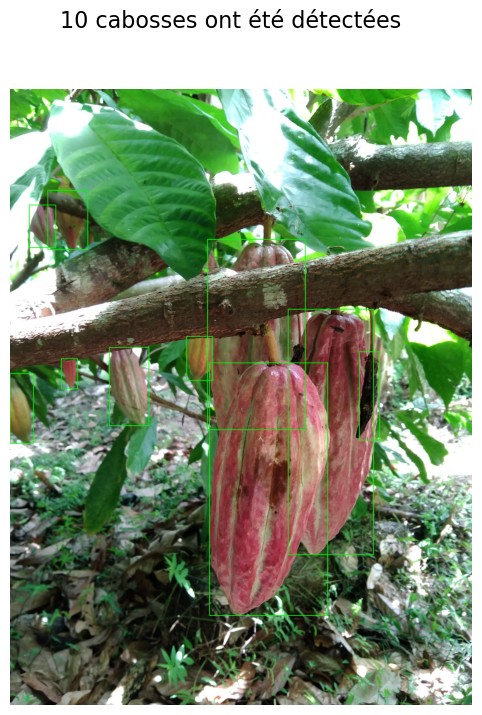

In [ ]:
# Dessiner les boîtes englobantes
nb_cabosses = len(boxes)

if nb_cabosses == 1:
    titre = "Une cabosse a été détectée"
else:
    titre = f"{nb_cabosses} cabosses ont été détectées"

for box in boxes:
    x1, y1, x2, y2 = map(int, box)  # Convertir en entiers
    cv2.rectangle(image, (x1, y1), (x2, y2), (0, 255, 0), 3)  # Dessiner en vert

# Afficher l'image avec les boîtes
plt.figure(figsize=(8, 8))
plt.suptitle(titre, fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.show()
